In [1]:
import os
import csv
import pandas as pd
import numpy as np

#load datasets

airbnb_crime = pd.read_csv('cleaned_airnb_crime.csv')


In [2]:
airbnb_crime.shape

(38821, 28)

In [ ]:
airbnb_crime['room_type'] = airbnb_crime['room_type'].replace({'Shared room':'1','Private room':'2','Entire home/apt':'3'})

In [84]:
airbnb_crime.dtypes

id                                                     int64
neighbourhood_group                                   object
latitude                                             float64
longitude                                            float64
room_type                                             object
price                                                  int64
minimum_nights                                         int64
number_of_reviews                                      int64
last_review                                           object
reviews_per_month                                    float64
calculated_host_listings_count                         int64
availability_365                                       int64
crime_count                                            int64
distance_to_statue_of_liberty_km                     float64
distance_to_times_square_km                          float64
distance_to_central_park_km                          float64
distance_to_empire_state

In [85]:
#=========================================== 1ST ML REGRESSION AND LINEAR REGRESSION TEST ===========================================

In [86]:
from sklearn.model_selection import train_test_split

In [111]:
X = airbnb_crime.drop(['id', 'last_review','neighbourhood_group','room_type','price'], axis=1)
y = airbnb_crime['price']

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [112]:
X_train.head()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,crime_count,distance_to_statue_of_liberty_km,distance_to_times_square_km,...,distance_to_rockefeller_center_km,distance_to_one_world_trade_center_km,distance_to_broadway_km,distance_to_grand_central_terminal_km,distance_to_the_metropolitan_museum_of_art_km,distance_to_american_museum_of_natural_history_km,distance_to_9/11_memorial_and_museum_km,distance_to_fifth_avenue_km,distance_to_chrysler_building_km,distance_to_the_high_line_km
28907,40.74290,-73.99428,29,2,0.29,96,311,69472,7.314946,1.938493,...,2.197824,3.719723,1.972795,1.804705,4.830995,4.601686,3.844289,4.344451,1.870980,1.049113
37419,40.68713,-73.98592,1,1,0.59,1,365,363909,4.944985,7.980293,...,7.986048,3.670179,7.993734,7.330625,10.440388,10.522035,3.564183,9.961933,7.230015,6.951394
10999,40.72767,-74.00344,2,20,0.48,1,0,69472,5.498462,3.799397,...,4.035968,1.859393,3.833858,3.555111,6.678171,6.461278,1.983252,6.188652,3.567563,2.262455
28196,40.71215,-73.94082,2,70,5.79,2,30,363909,9.103833,6.399719,...,6.083644,6.116238,6.377978,5.456024,7.716765,8.183573,6.116111,7.336198,5.266830,6.701888
29403,40.83005,-73.93992,1,29,3.02,1,103,69472,17.964322,8.779719,...,8.574201,14.436657,8.744295,9.153753,5.960474,6.130056,14.561174,6.451650,9.212546,10.632819


In [90]:
y_train.head()

28907    232
37419    250
10999    200
28196     69
29403    119
Name: price, dtype: int64

In [114]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=10) # n_neighbours is a "hyperparameter", which can be changed to improve performance of the model
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10)

In [115]:
knn.score(X_test, y_test)  # R2 = 0.04

0.0807521739535656

In [116]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [117]:
lr.score(X_test, y_test) # R2 = 0.08

0.08777384059966142

Obs:Our model improves with linear regression.  lr = 0.088 > R2 = 0.081

In [95]:
#=========================================== 2ND ML REGRESSION AND LINEAR REGRESSION TEST ===========================================

In [96]:
#Normalization 

from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler() # an exxample of a transformer

minmax.fit(X_train) #Fit to our data training 

X_train_transformed = minmax.transform(X_train) # Transform  our data training
X_test_transformed = minmax.transform(X_test) 

In [97]:
# Put transformed data into a DataFrame
X_train_transformed = pd.DataFrame(minmax.transform(X_train), columns=X_train.columns) 
X_test_transformed = pd.DataFrame(minmax.transform(X_test), columns=X_train.columns)

In [98]:
X_train_transformed

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,crime_count,distance_to_statue_of_liberty_km,distance_to_times_square_km,...,distance_to_rockefeller_center_km,distance_to_one_world_trade_center_km,distance_to_broadway_km,distance_to_grand_central_terminal_km,distance_to_the_metropolitan_museum_of_art_km,distance_to_american_museum_of_natural_history_km,distance_to_9/11_memorial_and_museum_km,distance_to_fifth_avenue_km,distance_to_chrysler_building_km,distance_to_the_high_line_km
0,0.588826,0.466111,0.022418,0.001592,0.004787,0.291411,0.852055,0.000000,0.179923,0.054271,...,0.059166,0.120987,0.054772,0.050859,0.121444,0.121089,0.128659,0.112452,0.052726,0.031157
1,0.449966,0.481978,0.000000,0.000000,0.009916,0.000000,1.000000,0.624909,0.091419,0.226271,...,0.222785,0.119309,0.226037,0.208684,0.269605,0.278239,0.119170,0.262308,0.205740,0.209060
2,0.550905,0.448725,0.000801,0.030255,0.008036,0.000000,0.000000,0.000000,0.112088,0.107248,...,0.111126,0.057974,0.107710,0.100852,0.170234,0.170450,0.065615,0.161649,0.101168,0.067729
3,0.512263,0.567578,0.000801,0.109873,0.098820,0.003067,0.082192,0.624909,0.246727,0.181275,...,0.169009,0.202161,0.180077,0.155144,0.197666,0.216167,0.205619,0.192262,0.149686,0.201540
4,0.805816,0.569287,0.000000,0.044586,0.051462,0.000000,0.282192,0.000000,0.577611,0.249029,...,0.239411,0.483990,0.247387,0.260754,0.151277,0.161658,0.491703,0.168665,0.262346,0.320024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31051,0.455892,0.540209,0.000801,0.020701,0.004445,0.003067,0.000000,0.624909,0.187808,0.230138,...,0.221689,0.182658,0.229380,0.206937,0.258558,0.273162,0.183981,0.252375,0.202424,0.232441
31052,0.647835,0.469376,0.004804,0.007962,0.002223,0.000000,0.000000,0.000000,0.267154,0.029286,...,0.038309,0.206366,0.029504,0.056774,0.069163,0.059041,0.214310,0.062428,0.062337,0.069174
31053,0.581082,0.877522,0.000000,0.000000,0.016926,0.000000,0.487671,0.930002,0.772873,0.500619,...,0.479718,0.675878,0.498255,0.481572,0.423107,0.454962,0.680107,0.432224,0.476547,0.577223
31054,0.671489,0.545125,0.002402,0.160828,0.019491,0.003067,0.767123,0.000000,0.368925,0.094109,...,0.079595,0.289912,0.092104,0.094214,0.019362,0.049064,0.297169,0.025795,0.094143,0.161945


In [99]:
#Put transformed data into a DataFrame 
X_train_transformed = pd.DataFrame(minmax.transform(X_train))
X_test_transformed = pd.DataFrame(minmax.transform(X_test))

In [100]:

knn.fit(X_train_transformed, y_train)

KNeighborsRegressor(n_neighbors=10)

In [101]:
lr.fit(X_train_transformed, y_train)

LinearRegression()

In [102]:
knn.score(X_test_transformed, y_test) # R2 = 0.6

0.08885956454344324

In [103]:
lr.score(X_test_transformed, y_test) # R2 = 0.08

0.0877738405987164

Obs: With raw data we obtain a R2 of 0.04, just by normalizing our data, model's perfomance increase to a R2 of 0.06. For linear regression the R2 maintain.

This happens because KNN is a distance based algorithm, so its suffers a lot with data in completely different scales.

In [21]:
#=========================================== 3RD ML TEST ===========================================

In [104]:
# neighbourhood_group - nominal -> One Hot Encoding
airbnb_crime.neighbourhood_group.value_counts(dropna=False)

neighbourhood_group
Manhattan        16621
Brooklyn         16439
Queens            4572
Bronx              875
Staten Island      314
Name: count, dtype: int64

In [105]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor(
    max_depth=10, # 30, 50, 100 - we can have many more splits when we have continuous variables
    min_samples_split=2,
    max_leaf_nodes=30 # basically equivalent to max_depth but still considered
)

In [106]:
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, max_leaf_nodes=30)

In [107]:
from sklearn.metrics import r2_score

y_pred = dt_reg.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("R2 Score:",r2)


R2 Score: 0.10075740637833341


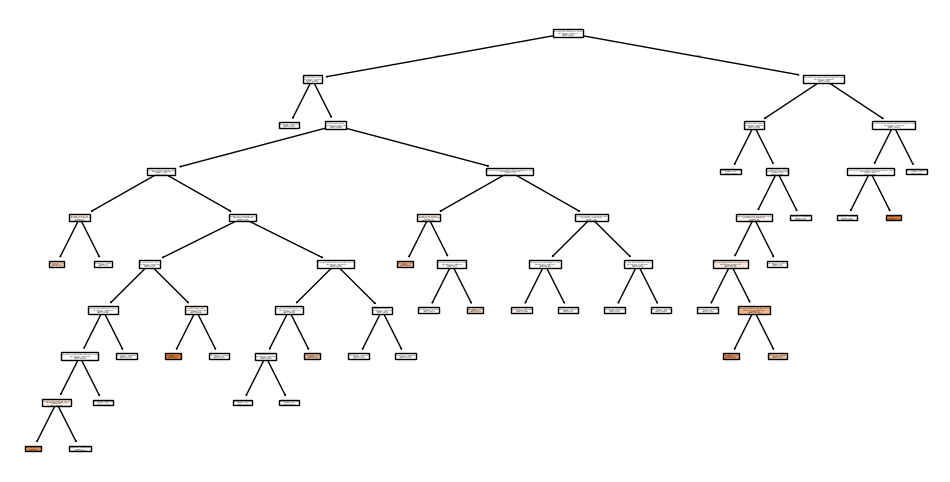

In [108]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
tree.plot_tree(dt_reg, filled=True, feature_names=X_train.columns)
plt.show()

In [109]:
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)
print("R²:", r2_score(y_test, dt_reg.predict(X_test)))

R²: -1.1970945668777722


In [110]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
print("RF R²:", r2_score(y_test, rf.predict(X_test)))

KeyboardInterrupt: 